In [1]:
from tqdm import tqdm
import math
import numpy as np
import tensorflow as tf
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer 
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
import nltk
#nltk.download()
from nltk.corpus import brown
brown.categories()
from nltk.tokenize import word_tokenize
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import pickle
import gensim
from gensim.models import word2vec

F:\wuren\Miniconda3\envs\carnd-term1\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\wuren\Miniconda3\envs\carnd-term1\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [2]:
news = fetch_20newsgroups(subset='all')
print(len(news.data))
print(news.data[0])
print(news.target[0])
ids = list(set(news.target))
print(ids)

18846
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!


10
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0]
[799.0, 973.0, 985.0, 982.0, 963.0, 988.0, 975.0, 990.0, 996.0, 994.0, 999.0, 991.0, 984.0, 990.0, 987.0, 997.0, 910.0, 940.0, 775.0, 628.0]
20


TypeError: text() missing 1 required positional argument: 's'

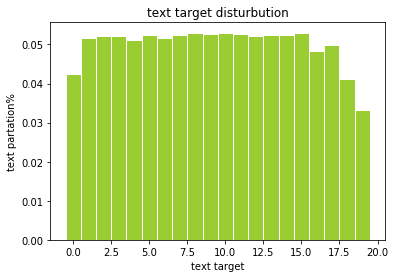

In [3]:
dict = {0.:0., 1.:0., 2.:0., 3.:0., 4.:0., 5.:0., 6.:0., 7.:0., 8.:0., 9.:0., 10.:0., 11.:0., 12.:0., 13.:0., 14.:0., 15.:0., 16.:0., 17.:0., 18.:0., 19.:0.}
for i, _ in enumerate(news.target):
    if news.target[i]==0:
        dict[0.] = dict[0.] + 1.
    if news.target[i]==1:
        dict[1.] = dict[1.] + 1.
    if news.target[i]==2:
        dict[2.] = dict[2.] + 1.
    if news.target[i]==3:
        dict[3.] = dict[3.] + 1.
    if news.target[i]==4:
        dict[4.] = dict[4.] + 1.
    if news.target[i]==5:
        dict[5.] = dict[5.] + 1.
    if news.target[i]==6:
        dict[6.] = dict[6.] + 1.
    if news.target[i]==7:
        dict[7.] = dict[7.] + 1.
    if news.target[i]==8:
        dict[8.] = dict[8.] + 1.
    if news.target[i]==9:
        dict[9.] = dict[9.] + 1.
    if news.target[i]==10:
        dict[10.] = dict[10.] + 1.
    if news.target[i]==11:
        dict[11.] = dict[11.] + 1.
    if news.target[i]==12:
        dict[12.] = dict[12.] + 1.
    if news.target[i]==13:
        dict[13.] = dict[13.] + 1.
    if news.target[i]==14:
        dict[14.] = dict[14.] + 1.
    if news.target[i]==15:
        dict[15.] = dict[15.] + 1.
    if news.target[i]==16:
        dict[16.] = dict[16.] + 1.
    if news.target[i]==17:
        dict[17.] = dict[17.] + 1.
    if news.target[i]==18:
        dict[18.] = dict[18.] + 1.
    if news.target[i]==19:
        dict[19.] = dict[19.] + 1.

x = list(dict.keys())
print(x)
y = list(dict.values())
print(y)
for i, _ in enumerate(y):
    y[i] = y[i] / 18846.
print(len(y))

plt.xlabel('text target')
plt.ylabel('text partation%')
plt.title("text target disturbution")

plt.bar(left=x, height=y, width=1.0, facecolor = 'yellowgreen', edgecolor = 'white')

for xx,yy in zip(x,y):
    plt.text(xx, yy, ha='center', va= 'bottom')

plt.ylim(0,0.07)
plt.show()

In [4]:
X_train,X_test,y_train,y_test = train_test_split(news.data,news.target,test_size=0.25,random_state=33)
count_v1= CountVectorizer(stop_words = 'english', max_df = 0.5)
counts_train = count_v1.fit_transform(X_train)
print ("the shape of train is "+repr(counts_train.shape))

the shape of train is (14134, 150409)


In [5]:
count_v2 = CountVectorizer(vocabulary=count_v1.vocabulary_)
counts_test = count_v2.fit_transform(X_test)
print ("the shape of test is "+repr(counts_test.shape))

the shape of test is (4712, 150409)


In [6]:
tfidftransformer = TfidfTransformer()
tfidf_train = tfidftransformer.fit(counts_train).transform(counts_train)
tfidf_test = tfidftransformer.fit(counts_test).transform(counts_test)

In [7]:
mnb = MultinomialNB(alpha = 0.01)
mnb.fit(tfidf_train, y_train)
m_pred = mnb.predict(tfidf_test)
m_precision = metrics.precision_score(y_test, m_pred, average='micro')
print ('precision:{0:.3f}'.format(m_precision))

precision:0.916


In [8]:
svc = SVC(kernel = 'linear')
svc.fit(tfidf_train, y_train)
s_pred = svc.predict(tfidf_test)
s_precision = metrics.precision_score(y_test, s_pred, average='micro')
print ('precision:{0:.3f}'.format(s_precision))

precision:0.919


In [9]:
wordnet_lemmatizer = WordNetLemmatizer()
emoticons_str = r"""
(?:
[:=;] 
[oO\-]? 
[D\)\]\(\]/\\OpP] 
)"""
regex_str = [
emoticons_str,
r'<[^>]+>', 
r'(?:@[\w_]+)', 
r"(?:\#+[\w_]+[\w\'_\-]*[\w_]+)", 
r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&amp;+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+',
r'(?:(?:\d+,?)+(?:\.?\d+)?)', 
r"(?:[a-z][a-z'\-_]+[a-z])", 
r'(?:[\w_]+)', 
r'(?:\S)' 
]
tokens_re = re.compile(r'('+'|'.join(regex_str)+')', re.VERBOSE | re.IGNORECASE)
emoticon_re = re.compile(r'^'+emoticons_str+'$', re.VERBOSE | re.IGNORECASE)

In [10]:
def tokenize(s):
    return tokens_re.findall(s)

In [11]:
def preprocess(s, lowercase=False):
    tokens = tokenize(s)
    if lowercase:
        tokens = [token if emoticon_re.search(token) else token.lower() for token in tokens]
    return tokens

In [12]:
sample = []
a = [',', '"', ';', '(', ')', '--', '>', '<', '|', '+', '-', '*', '/', '[', ']', '{', '}', '^', ':', '\'', '=', '_', '#', '~', '@', '$', '%', '\\', '__', '___________________________________', '&']
for i, t in enumerate(news.data):
    mm = str(t)
    l = mm.split("\n")
    a1=-1
    b1=-1
    for j, s in enumerate(l):
        ss = s.split(" ")
        if ss[0]=="begin":
            a1 = j
        if ss[0]=="end":
            b1 = j
    if a1!=-1 and b1!=-1:
        del l[a1:b1+1]
    k=0
    while k<len(l):    
        if len(l[k])==0:
            del l[k]
        else:
            k += 1
    texts = []
    for s in l:
        text = preprocess(s, True)
        text = [word for word in text if word not in a]
        text = [word for word in text if word not in stopwords.words('english')]
        my_words = nltk.pos_tag(text)
        sub_text = []
        for word in my_words:
            if word[1]=='VB':
                ii = wordnet_lemmatizer.lemmatize(word[0], pos='v')
                sub_text.append(ii)
            else:
                ii = wordnet_lemmatizer.lemmatize(word[0])
                sub_text.append(ii)
        texts.append(sub_text)
    sample.append(texts)

In [13]:
for t in sample:
    c1 = []
    for j, s in enumerate(t):
        if len(s)!=0 and s[0]=="cut":
            c1.append(j)
    if len(c1)==2:
        del t[c1[0]:c1[1]+1]

In [14]:
for t in sample:   
    a1=-1
    b1=-1
    for j, s in enumerate(t):
        if len(s)!=0 and s[0]=="begin":
            a1 = j
        if len(s)!=0 and s[0]=="end":
            b1 = j
    if a1!=-1 and b1!=-1:
        del t[a1:b1+1]

In [15]:
X_sample = []
for t in sample:
    m=0
    n=0
    f=False
    l=0
    r=0
    my_texts=[]
    for s in t:
        subb=[]
        eee=[]
        for j, tt in enumerate(s):
            if tt=="." and f==False:
                m=j
                f=True
                continue
            if tt=="." and f:
                n=j
                f=False
            
            if m==0:
                continue
            if j-m==2 and n==0:
                m=0
                f=False
            y=n-m    
            if m!=0 and n!=0 and y==2:
                l=m-1
            if m!=0 and n!=0 and y==-2:
                r=m+1
                m=0
                n=0
                f=False
                
            if l!=0 and r!=0:
                for p in range(l, r+1):
                    eee.append(p)
                l=0
                r=0
                
        for j, tt in enumerate(s):
            if j in eee:
                continue
            subb.append(tt)
        my_texts.append(subb)
        m=0
        n=0
        l=0
        r=0
        f=False
    X_sample.append(my_texts)

In [16]:
d = [".", "!", "?"]
X = []
for t in X_sample:
    XX = []
    for i, tt in enumerate(t):
        k = 0
        flag = True
        for j, w in enumerate(tt):
            if w in d:
                b = tt[k:j]
                flag = False
                XX.append(b)
                k = j+1     
        if flag:
            XX.append(tt)
    X.append(XX)

In [17]:
for t in X:
    j = 0
    while j<len(t):    
        if len(t[j])==0:
            del t[j]
        else:
            j += 1

In [18]:
for t in X:   
    a1=-1
    b1=-1
    for j, s in enumerate(t):
        if len(s)!=0 and s[0]=="part":
            a1 = j
        if len(s)!=0 and s[0]=="end":
            b1 = j
    if a1!=-1 and b1!=-1:
        del t[a1:b1+1]

In [19]:
for t in X:
    j = 0
    while j<len(t):    
        if len(t[j])<=1:
            del t[j]
        else:
            j += 1

In [20]:
for t in X:
    j = 0
    while j<len(t):    
        if t[j][0]=='\x08':
            del t[j]
        else:
            j += 1

In [21]:
max_len = 0
max_list = 0
tmp1=0
tmp2=0
for i, t in enumerate(X):
    if max_list<len(t):
        max_list = len(t)
        tmp1 = i
    for j, s in enumerate(t):
        if max_len<len(s):
            max_len = len(s)
            tmp2 = i
print (max_len)
print (max_list)
print (tmp1)
print (tmp2)

40
1345
2694
4378


In [22]:
del X[2694]
Y = []
for i in news.target:
    Y.append(i)
del Y[2694]

In [23]:
output = open("./sample_X", 'wb')
pickle.dump(X, output)
db = open("./sample_X", 'rb')
X = pickle.load(db)
output1 = open("./sample_Y", 'wb')
pickle.dump(Y, output1)
db1 = open("./sample_Y", 'rb')
Y = pickle.load(db1)

In [2]:
db = open("./sample_X", 'rb')
X = pickle.load(db)
db1 = open("./sample_Y", 'rb')
Y = pickle.load(db1)

In [3]:
class MySentences(object):
    def __init__(self, texts, max_len):
        self.texts = texts
        self.max_len = max_len
    def __del__(self):
        print ('over')
    def __iter__(self):
        for t in self.texts:
            for s in t:
                if self.max_len<len(s):
                    self.max_len = len(s)
                yield s
        return word2vec.Text8Corpus("./text8")

In [4]:
sentences = MySentences(X, 0)
model = word2vec.Word2Vec(sentences, min_count=1, size=100)

In [5]:
k=1
em_sen={}
for w, _ in model.wv.vocab.items():
    em_sen[w] = k
    k = k + 1

i=1
em_mx = np.zeros((len(model.wv.vocab) + 1, 100), dtype=np.float32)
for w, v in model.wv.vocab.items():
    em_mx[i] = model[w].reshape((1,100))
    i = i + 1

F:\wuren\Miniconda3\envs\carnd-term1\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [3]:
output3 = open("./em_sen", 'wb')
pickle.dump(em_sen, output3)
db3 = open("./em_sen", 'rb')
em_sen = pickle.load(db3)

In [7]:
max_len = sentences.max_len
del sentences
print (max_len)
max_len = 100

over
40


In [4]:
def div_xy(X_, Y_, le=40):
    h=0
    for s in X_:
        h+=len(s)
    t = int(h/le)
    if t>0:
        if h%le==0:
            m = ""
            ff=np.zeros((t, le), dtype=np.int32)
            y=[]
            for ii in range(t):
                y.append(Y_)
            tmp=0
            e=0
            for j, s in enumerate(X_):
                tmp+=len(s)
                if j==len(X_)-1:
                    if tmp<=le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            m += str(em_sen[w]) + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                m += str(em_sen[w]) + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                else:
                    if tmp<le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                    elif tmp==le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            m += str(em_sen[w]) + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                m += str(em_sen[w]) + " "
            return ff, y
        else:
            m = ""
            ff=np.zeros((t+1, le), dtype=np.int32)
            y=[]
            for ii in range(t+1):
                y.append(Y_)
            tmp=0
            e=0
            for j, s in enumerate(X_):
                tmp+=len(s)
                if j==len(X_)-1:
                    if tmp<=le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            m += str(em_sen[w]) + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                m += str(em_sen[w]) + " "
                        tmp2=le-tmp
                        if tmp2!=0:
                            for i in range(tmp2):
                                m += "0" + " "
                        m = m.strip()
                        g = m.split(" ")
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                else:
                    if tmp<le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                    elif tmp==le:
                        for w in s:
                            m += str(em_sen[w]) + " "
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                    else:
                        tmp-=len(s)
                        tmp2=le-tmp
                        kk=-1
                        for k, w in enumerate(s):
                            m += str(em_sen[w]) + " "
                            tmp2-=1
                            if tmp2==0:
                                kk=k
                                break
                        m = m.strip()
                        g = m.split(" ")
                        sub=[]
                        for gg in g:
                            sub.append(int(gg))
                        ff[e] = sub
                        e+=1
                        m=""
                        sub=[]
                        tmp=0
                        for k, w in enumerate(s):
                            if k>kk:
                                tmp+=1
                                m += str(em_sen[w]) + " " 
            return ff, y
    else:
        m = ""
        ff=np.zeros((1, le), dtype=np.int32)
        y=[]
        y.append(Y_)
        tmp=0
        e=0
        for j, s in enumerate(X_):
            tmp+=len(s)
            for w in s:
                m += str(em_sen[w]) + " "
        tmp2=le-tmp
        if tmp2!=0:
            for i in range(tmp2):
                m += "0" + " "
        m = m.strip()
        g = m.split(" ")
        sub=[]
        for gg in g:
            sub.append(int(gg))
        ff[e] = sub
        return ff, y

In [9]:
class cnn_Model():
    def __init__(self, num_classes, embedding_size, word_dict, num_filters, filter_sizes, sequence_length):
        self.embedding_size = embedding_size
        self.word_dict = word_dict
        self.filter_sizes = filter_sizes
        self.num_filters = num_filters
        self.sequence_length = sequence_length
        self.num_classes = num_classes
        self.num_filters_total = self.num_filters * 3
        self.encoder_inputs = tf.placeholder(tf.int32, [None, self.sequence_length], name="cnn_encoder_inputs")
        self.dropout_keep_prob = tf.placeholder(tf.float32, name="cnn_dropout_keep_prob")
        self.onehot = tf.placeholder(tf.int32, [None], name="cnn_onehot_in")
        self.y = tf.one_hot(self.onehot,20,1,0,name="cnn_one_hot")
        self.y_out = tf.placeholder(tf.float32, [None, self.num_classes], name="cnn_y_out")
        l2_loss = tf.constant(0.0)

        with tf.name_scope("cnn_embedding"):
            self.em = tf.Variable(self.word_dict, name="em")
            embedded_chars = tf.nn.embedding_lookup(self.em, self.encoder_inputs)
            embedded_chars_expanded = tf.expand_dims(embedded_chars, -1)

        pooled_outputs = []
        for i, filter_size in enumerate(self.filter_sizes):
            with tf.name_scope("conv-maxpool-%s" % filter_size):
                filter_shape = [filter_size, self.embedding_size, 1, self.num_filters]
                W = tf.Variable(tf.truncated_normal(filter_shape, stddev=0.1), name="W")
                b = tf.Variable(tf.constant(0.1, shape=[self.num_filters]), name="b")
                conv = tf.nn.conv2d(
                    embedded_chars_expanded,
                    W,
                    strides=[1, 1, 1, 1],
                    padding="VALID",
                    name="conv")
                h = tf.nn.relu(tf.nn.bias_add(conv, b), name="relu")
                print (h.shape)
                pooled = tf.nn.max_pool(
                    h,
                    ksize=[1, self.sequence_length - filter_size + 1, 1, 1],
                    strides=[1, 1, 1, 1],
                    padding='VALID',
                    name="pool")
                print (pooled.shape)
                pooled_outputs.append(pooled)

        h_pool = tf.concat(pooled_outputs, 3)
        print (h_pool.shape)
        h_pool_flat = tf.reshape(h_pool, [-1, self.num_filters_total])
        print (h_pool_flat.shape)
        
        # Add dropout
        with tf.name_scope("cnn_dropout"):
            self.h_drop = tf.nn.dropout(h_pool_flat, self.dropout_keep_prob)
            
        with tf.name_scope("cnn_output"):
            W = tf.get_variable(
                "W",
                shape=[self.num_filters_total, self.num_classes],
                initializer=tf.contrib.layers.xavier_initializer())
            b = tf.Variable(tf.constant(0.1, shape=[self.num_classes]), name="b")
            l2_loss += tf.nn.l2_loss(W)
            l2_loss += tf.nn.l2_loss(b)
            self.scores = tf.nn.xw_plus_b(self.h_drop, W, b, name="scores")
            self.predictions = tf.argmax(self.scores, 1, name="predictions")
            
        with tf.name_scope("loss"):
            losses = tf.nn.softmax_cross_entropy_with_logits(logits=self.scores, labels=self.y_out)
            self.loss = tf.reduce_mean(losses) + 0.5 * l2_loss 
            
        with tf.name_scope("accuracy"):
            correct_predictions = tf.equal(self.predictions, tf.argmax(self.y_out, 1))
            self.accuracy = tf.reduce_mean(tf.cast(correct_predictions, "float"), name="accuracy")

In [16]:
class rnn_Model():
    def __init__(self, rnn_size, num_classes, embedding_size, word_dict, attn_size, layer_size, sequence_length):
        self.rnn_size = rnn_size
        self.attn_size = attn_size
        self.embedding_size = embedding_size
        self.word_dict = word_dict
        self.layer_size = layer_size
        self.sequence_length = sequence_length
        self.num_classes = num_classes
        self.encoder_inputs = tf.placeholder(tf.int32, [None, self.sequence_length], name="rnn_encoder_inputs")
        self.dropout_keep_prob = tf.placeholder(tf.float32, name="rnn_dropout_keep_prob")
        self.onehot = tf.placeholder(tf.int32, [None], name="rnn_onehot_in")
        self.y = tf.one_hot(self.onehot,20,1,0)
        self.y_out = tf.placeholder(tf.float32, [None, self.num_classes], name="rnn_y_out")
        
        # 定义前向RNN Cell
        with tf.name_scope('fw_rnn'), tf.variable_scope('fw_rnn'):
            print (tf.get_variable_scope().name)
            lstm_fw_cell_list = [tf.contrib.rnn.LSTMCell(self.rnn_size) for _ in range(self.layer_size)]
            lstm_fw_cell_m = tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.MultiRNNCell(lstm_fw_cell_list), output_keep_prob=self.dropout_keep_prob)

        # 定义反向RNN Cell
        with tf.name_scope('bw_rnn'), tf.variable_scope('bw_rnn'):
            print (tf.get_variable_scope().name)
            lstm_bw_cell_list = [tf.contrib.rnn.LSTMCell(self.rnn_size) for _ in range(self.layer_size)]
            lstm_bw_cell_m = tf.contrib.rnn.DropoutWrapper(tf.contrib.rnn.MultiRNNCell(lstm_bw_cell_list), output_keep_prob=self.dropout_keep_prob)

        with tf.name_scope("rnn_embedding"):
            self.em = tf.Variable(self.word_dict, name="em")
            embedded_chars = tf.nn.embedding_lookup(self.em, self.encoder_inputs)
            embedded_chars = tf.transpose(embedded_chars, [1,0,2])
            embedded_chars = tf.reshape(embedded_chars, [-1, self.rnn_size])
            embedded_chars = tf.split(embedded_chars, self.sequence_length, 0)

        with tf.name_scope('bi_rnn'), tf.variable_scope('bi_rnn'):
            outputs, _, _ = tf.contrib.rnn.static_bidirectional_rnn(lstm_fw_cell_m, lstm_bw_cell_m, embedded_chars, dtype=tf.float32)
            
        with tf.name_scope('attention'), tf.variable_scope('attention'):
            attention_w = tf.Variable(tf.truncated_normal([2*self.rnn_size, self.attn_size], stddev=0.1), name='attention_w')
            attention_b = tf.Variable(tf.constant(0.1, shape=[self.attn_size]), name='attention_b')
            u_list = []
            for t in range(self.sequence_length):
                u_t = tf.tanh(tf.matmul(outputs[t], attention_w) + attention_b) 
                u_list.append(u_t)
            u_w = tf.Variable(tf.truncated_normal([self.attn_size, 1], stddev=0.1), name='attention_uw')
            attn_z = []
            for t in range(self.sequence_length):
                z_t = tf.matmul(u_list[t], u_w)
                attn_z.append(z_t)
            # transform to batch_size * sequence_length
            attn_zconcat = tf.concat(attn_z, axis=1)
            alpha = tf.nn.softmax(attn_zconcat)
            # transform to sequence_length * batch_size * 1 , same rank as outputs
            alpha_trans = tf.reshape(tf.transpose(alpha, [1,0]), [self.sequence_length, -1, 1])
            final_output = tf.reduce_sum(outputs * alpha_trans, 0)
            
        print (final_output.shape)
        # outputs shape: (sequence_length, batch_size, 2*rnn_size)
        fc_w = tf.Variable(tf.truncated_normal([2*self.rnn_size, self.num_classes], stddev=0.1), name='fc_w')
        fc_b = tf.Variable(tf.zeros([self.num_classes]), name='fc_b')
        logits = tf.matmul(final_output, fc_w) + fc_b
        prob = tf.nn.softmax(logits, name='rnn_prob')
        self.loss = tf.losses.softmax_cross_entropy(self.y_out, logits)
        self.accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(self.y_out, axis=1), tf.argmax(prob, axis=1)), tf.float32))

In [5]:
train_data, valid_data, train_target, valid_target = train_test_split(X, Y, random_state=1234)

In [11]:
epochs=30
cnn_train_loss_batch = []
cnn_valid_loss_batch = []
cnn_train_acc_batch = []
cnn_valid_acc_batch = []
cnn_train_batches = []
cnn_valid_batches = []

rnn_train_loss_batch = []
rnn_valid_loss_batch = []
rnn_train_acc_batch = []
rnn_valid_acc_batch = []
rnn_train_batches = []
rnn_valid_batches = []
log_batch_step=256
filter_sizes = [2, 3, 4]
batch_size=64
cnn_max_vacc=0.0
rnn_max_vacc=0.0

In [12]:
with tf.Session() as sess:
    rann = cnn_Model(20, 100, em_mx, 100, filter_sizes, max_len)
    optimizer = tf.train.AdamOptimizer(0.001).minimize(rann.loss)
    sess.run(tf.global_variables_initializer())
    saver1 = tf.train.Saver()
    batch_count = int(math.ceil(len(train_target)/batch_size))
    batch_count2 = int(math.ceil(len(valid_target)/batch_size))
    for epoch_i in tqdm(range(epochs)): 
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches') 
        for j in batches_pbar:
            batch_start = j*batch_size
            batch_seq = train_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
                
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            
            _, l, a = sess.run([optimizer, rann.loss, rann.accuracy], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 0.5
                                })
            if not j % log_batch_step:
                previous_batch = cnn_train_batches[-1] if cnn_train_batches else 0
                cnn_train_batches.append(log_batch_step + previous_batch)
                cnn_train_loss_batch.append(l)
                cnn_train_acc_batch.append(a)
                    
        batches_pbar2 = tqdm(range(batch_count2), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')              
        for j in batches_pbar2:
            batch_start = j*batch_size
            batch_seq = valid_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
                
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
           
            va, v_l = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            
            if not j % log_batch_step:
                previous_batch = cnn_valid_batches[-1] if cnn_valid_batches else 0
                cnn_valid_batches.append(log_batch_step + previous_batch)
                cnn_valid_loss_batch.append(v_l)
                cnn_valid_acc_batch.append(va)
                
        v_count = 0
        input_y_list = []
        for i in range(len(valid_target)):
            input_x, y_ = div_xy(valid_data[i], valid_target[i], max_len)
            v_count += input_x.shape[0]
            input_y_list.extend(y_)
        input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})
        input_x_list = np.zeros((v_count, max_len), dtype=np.int32)
        temp = 0
        for i in range(len(valid_target)):
            input_x, _ = div_xy(valid_data[i], valid_target[i], max_len)
            for k in range(input_x.shape[0]):
                input_x_list[temp+k] = input_x[k]
            temp += input_x.shape[0]
        vacc, _ = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
        if vacc>cnn_max_vacc:
            cnn_max_vacc = vacc
            saver1.save(sess,'cnn/cnn.ckpt', global_step=epoch_i)    
    print (cnn_max_vacc)

(?, 99, 1, 100)
(?, 1, 1, 100)
(?, 98, 1, 100)
(?, 1, 1, 100)
(?, 97, 1, 100)
(?, 1, 1, 100)
(?, 1, 1, 300)
(?, 300)


Epoch  1/30:  91%|████████████████████  | 202/221 [02:00<00:11,  1.68batches/s]


Epoch  1/30: 100%|██████████████████████| 221/221 [02:11<00:00,  1.68batches/s]

Epoch  2/30:  49%|██████████▊           | 109/221 [01:02<01:03,  1.75batches/s]


Epoch  2/30: 100%|██████████████████████| 221/221 [02:07<00:00,  1.73batches/s]

Epoch  3/30:   7%|█▋                     | 16/221 [00:08<01:53,  1.81batches/s]


Epoch  3/30: 100%|█████████████████████▉| 220/221 [02:04<00:00,  1.77batches/s]


Epoch  3/30: 100%|██████████████████████| 221/221 [02:04<00:00,  1.77batches/s]

Epoch  4/30:  57%|████████████▋         | 127/221 [01:10<00:52,  1.81batches/s]


Epoch  4/30: 100%|██████████████████████| 221/221 [02:03<00:00,  1.78batches/s]

Epoch  5/30:  15%|███▌                   | 34/221 [00:19<01:46,  1.76batches/s]


Epoch  5/30: 100%|██████████████████████| 221/221 [02:07<00:00,  1.73batches/s]

Epoch  5/30:  22%|█████▏                  | 16/74 [00:03<00:10,  5.29batches/s]


Epoch  6/30:  65%|██████████████▎       | 144/221 [01:20<00:42,  1.79batches/s]


Epoch  6/30: 100%|██████████████████████| 221/221 [02:04<00:00,  1.77batches/s]

Epoch  7/30:  23%|█████▏                 | 50/221 [00:27<01:35,  1.80batches/s]


Epoch  7/30: 100%|██████████████████████| 221/221 [02:04<00:00,  1.77batches/s]

Epoch  7/30:  43%|██████████▍             | 32/74 [00:05<00:07,  5.88batches/s]


Epoch  8/30:  73%|████████████████      | 161/221 [01:31<00:33,  1.77batches/s]


Epoch  8/30: 100%|██████████████████████| 221/221 [02:05<00:00,  1.76batches/s]

Epoch  9/30:  30%|██████▉                | 67/221 [00:37<01:26,  1.78batches/s]


Epoch  9/30: 100%|██████████████████████| 221/221 [02:05<00:00,  1.75batches/s]

Epoch  9/30:  66%|███████████████▉        | 49/74 [00:08<00:04,  5.53batches/s]


Epoch 10/30:  80%|█████████████████▌    | 177/221 [01:39<00:24,  1.79batches/s]


Epoch 10/30: 100%|██████████████████████| 221/221 [02:04<00:00,  1.78batches/s]

Epoch 11/30:  38%|████████▋              | 84/221 [00:54<01:28,  1.54batches/s]


Epoch 11/30: 100%|██████████████████████| 221/221 [02:26<00:00,  1.50batches/s]

Epoch 11/30:  89%|█████████████████████▍  | 66/74 [00:14<00:01,  4.64batches/s]


Epoch 12/30:  88%|███████████████████▍  | 195/221 [02:11<00:17,  1.48batches/s]


Epoch 12/30: 100%|██████████████████████| 221/221 [02:29<00:00,  1.48batches/s]

Epoch 13/30:  46%|██████████▏           | 102/221 [01:14<01:27,  1.36batches/s]


Epoch 13/30: 100%|██████████████████████| 221/221 [02:34<00:00,  1.43batches/s]

Epoch 14/30:   4%|▊                       | 8/221 [00:04<02:09,  1.64batches/s]


Epoch 14/30:  96%|█████████████████████ | 212/221 [02:16<00:05,  1.55batches/s]


Epoch 14/30: 100%|██████████████████████| 221/221 [02:22<00:00,  1.55batches/s]

Epoch 15/30:  53%|███████████▋          | 118/221 [01:18<01:08,  1.50batches/s]


Epoch 15/30: 100%|██████████████████████| 221/221 [02:32<00:00,  1.45batches/s]

Epoch 16/30:  11%|██▌                    | 25/221 [00:16<02:07,  1.54batches/s]


Epoch 16/30: 100%|██████████████████████| 221/221 [02:30<00:00,  1.47batches/s]

Epoch 16/30:   9%|██▎                      | 7/74 [00:01<00:15,  4.35batches/s]


Epoch 17/30:  61%|█████████████▍        | 135/221 [01:29<00:57,  1.50batches/s]


Epoch 17/30: 100%|██████████████████████| 221/221 [02:28<00:00,  1.49batches/s]

Epoch 18/30:  19%|████▎                  | 41/221 [00:26<01:56,  1.54batches/s]


Epoch 18/30: 100%|██████████████████████| 221/221 [02:29<00:00,  1.48batches/s]

Epoch 18/30:  31%|███████▍                | 23/74 [00:05<00:11,  4.35batches/s]


Epoch 19/30:  68%|███████████████       | 151/221 [01:40<00:46,  1.50batches/s]


Epoch 19/30: 100%|██████████████████████| 221/221 [02:28<00:00,  1.49batches/s]

Epoch 20/30:  26%|█████▉                 | 57/221 [00:37<01:49,  1.50batches/s]


Epoch 20/30: 100%|██████████████████████| 221/221 [02:33<00:00,  1.44batches/s]

Epoch 20/30:  53%|████████████▋           | 39/74 [00:08<00:07,  4.70batches/s]


Epoch 21/30:  76%|████████████████▋     | 168/221 [01:44<00:32,  1.61batches/s]


Epoch 21/30: 100%|██████████████████████| 221/221 [02:19<00:00,  1.59batches/s]

Epoch 22/30:  34%|███████▊               | 75/221 [00:50<01:37,  1.50batches/s]


Epoch 22/30: 100%|██████████████████████| 221/221 [02:39<00:00,  1.39batches/s]

Epoch 22/30:  77%|██████████████████▍     | 57/74 [00:12<00:03,  4.49batches/s]


Epoch 23/30:  84%|██████████████████▍   | 185/221 [02:09<00:25,  1.43batches/s]


Epoch 23/30: 100%|██████████████████████| 221/221 [02:32<00:00,  1.45batches/s]

Epoch 24/30:  41%|█████████▍             | 91/221 [01:00<01:26,  1.51batches/s]


Epoch 24/30: 100%|██████████████████████| 221/221 [02:29<00:00,  1.48batches/s]

Epoch 24/30:  99%|███████████████████████▋| 73/74 [00:17<00:00,  4.21batches/s]


Epoch 25/30:  91%|████████████████████  | 201/221 [02:24<00:14,  1.39batches/s]


Epoch 25/30: 100%|██████████████████████| 221/221 [02:40<00:00,  1.38batches/s]

Epoch 26/30:  48%|██████████▋           | 107/221 [01:10<01:15,  1.52batches/s]


Epoch 26/30: 100%|██████████████████████| 221/221 [02:26<00:00,  1.51batches/s]

Epoch 27/30:   6%|█▎                     | 13/221 [00:08<02:16,  1.53batches/s]


Epoch 27/30:  98%|█████████████████████▌| 217/221 [02:27<00:02,  1.47batches/s]


Epoch 27/30: 100%|██████████████████████| 221/221 [02:30<00:00,  1.47batches/s]

Epoch 28/30:  56%|████████████▏         | 123/221 [01:19<01:03,  1.55batches/s]


Epoch 28/30: 100%|██████████████████████| 221/221 [02:27<00:00,  1.50batches/s]

Epoch 29/30:  13%|███                    | 29/221 [00:19<02:06,  1.52batches/s]


Epoch 29/30: 100%|██████████████████████| 221/221 [02:26<00:00,  1.51batches/s]

Epoch 29/30:  15%|███▌                    | 11/74 [00:02<00:14,  4.29batches/s]


Epoch 30/30:  63%|█████████████▊        | 139/221 [01:31<00:53,  1.52batches/s]


Epoch 30/30: 100%|██████████████████████| 221/221 [02:28<00:00,  1.49batches/s]

100%|███████████████████████████████████████| 30/30 [1:26:56<00:00, 173.88s/it]


0.797943


In [13]:
output4 = open("./em_mx", 'wb')
pickle.dump(em_mx, output4)
db4 = open("./em_mx", 'rb')
em_mx = pickle.load(db4)

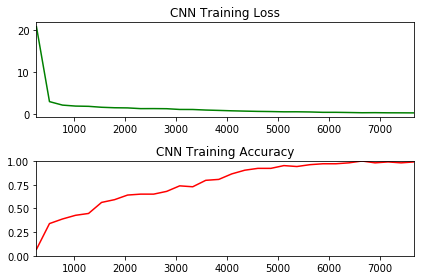

In [14]:
train_loss_plot = plt.subplot(211)
train_loss_plot.set_title('CNN Training Loss')
train_loss_plot.plot(cnn_train_batches, cnn_train_loss_batch, 'g')
train_loss_plot.set_xlim([cnn_train_batches[0], cnn_train_batches[-1]])

train_acc_plot = plt.subplot(212)
train_acc_plot.set_title('CNN Training Accuracy')
train_acc_plot.plot(cnn_train_batches, cnn_train_acc_batch, 'r')
train_acc_plot.set_ylim([0, 1.0])
train_acc_plot.set_xlim([cnn_train_batches[0], cnn_train_batches[-1]])

plt.tight_layout()
plt.show()

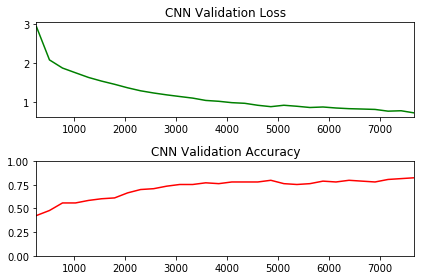

In [15]:
valid_loss_plot = plt.subplot(211)
valid_loss_plot.set_title('CNN Validation Loss')
valid_loss_plot.plot(cnn_valid_batches, cnn_valid_loss_batch, 'g')
valid_loss_plot.set_xlim([cnn_valid_batches[0], cnn_valid_batches[-1]])

valid_acc_plot = plt.subplot(212)
valid_acc_plot.set_title('CNN Validation Accuracy')
valid_acc_plot.plot(cnn_valid_batches, cnn_valid_acc_batch, 'r')
valid_acc_plot.set_ylim([0, 1.0])
valid_acc_plot.set_xlim([cnn_valid_batches[0], cnn_valid_batches[-1]])

plt.tight_layout()
plt.show()

In [17]:
with tf.Session() as sess:
    rann = rnn_Model(100, 20, 100, em_mx, 200, 2, max_len)
    tvars = tf.trainable_variables()
    grads, _ = tf.clip_by_global_norm(tf.gradients(rann.loss, tvars), 5.0)
    optimizer = tf.train.AdamOptimizer(0.001)
    train_op = optimizer.apply_gradients(zip(grads, tvars))
    sess.run(tf.global_variables_initializer())
    saver2 = tf.train.Saver()
    batch_count = int(math.ceil(len(train_target)/batch_size))
    batch_count2 = int(math.ceil(len(valid_target)/batch_size))
    for epoch_i in tqdm(range(epochs)):
        batches_pbar = tqdm(range(batch_count), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches') 
        for j in batches_pbar:
            batch_start = j*batch_size
            batch_seq = train_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
                
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(train_data[batch_start + k], train_target[batch_start + k], max_len)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
            
            _, l, a = sess.run([train_op, rann.loss, rann.accuracy], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 0.5
                                })
            if not j % log_batch_step:
                previous_batch = rnn_train_batches[-1] if rnn_train_batches else 0
                rnn_train_batches.append(log_batch_step + previous_batch)
                rnn_train_loss_batch.append(l)
                rnn_train_acc_batch.append(a)
                    
        batches_pbar2 = tqdm(range(batch_count2), desc='Epoch {:>2}/{}'.format(epoch_i+1, epochs), unit='batches')              
        for j in batches_pbar2:
            batch_start = j*batch_size
            batch_seq = valid_data[batch_start:batch_start + batch_size]
            input_x_count = 0
            input_y_list = []
            for k in range(len(batch_seq)):
                input_x, y_ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len)
                input_x_count += input_x.shape[0]
                input_y_list.extend(y_)
                
            input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})    
            input_x_list = np.zeros((input_x_count, max_len), dtype=np.int32)
            temp = 0
            for k in range(len(batch_seq)):
                input_x, _ = div_xy(valid_data[batch_start + k], valid_target[batch_start + k], max_len)
                for kk in range(input_x.shape[0]):
                    input_x_list[temp+kk] = input_x[kk]
                temp += input_x.shape[0]
           
            va, v_l = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
            
            if not j % log_batch_step:
                previous_batch = rnn_valid_batches[-1] if rnn_valid_batches else 0
                rnn_valid_batches.append(log_batch_step + previous_batch)
                rnn_valid_loss_batch.append(v_l)
                rnn_valid_acc_batch.append(va)
            
        v_count = 0
        input_y_list = []
        for i in range(len(valid_target)):
            input_x, y_ = div_xy(valid_data[i], valid_target[i], max_len)
            v_count += input_x.shape[0]
            input_y_list.extend(y_)
        input_y = sess.run(rann.y, feed_dict = {rann.onehot:input_y_list})
        input_x_list = np.zeros((v_count, max_len), dtype=np.int32)
        temp = 0
        for i in range(len(valid_target)):
            input_x, _ = div_xy(valid_data[i], valid_target[i], max_len)
            for k in range(input_x.shape[0]):
                input_x_list[temp+k] = input_x[k]
            temp += input_x.shape[0]
        vacc, _ = sess.run([rann.accuracy, rann.loss], feed_dict = {
                                  rann.encoder_inputs : input_x_list,
                                  rann.y_out : input_y,
                                  rann.dropout_keep_prob : 1.0
                                })
        if vacc>rnn_max_vacc:
            rnn_max_vacc = vacc
            saver2.save(sess,'rnn/rnn.ckpt', global_step=epoch_i)
    print (rnn_max_vacc)

fw_rnn
bw_rnn
(?, 200)


Epoch  1/30:  91%|████████████████████  | 202/221 [05:10<00:29,  1.54s/batches]


Epoch  1/30: 100%|██████████████████████| 221/221 [05:38<00:00,  1.53s/batches]

Epoch  2/30:  49%|██████████▊           | 108/221 [03:00<03:08,  1.67s/batches]


Epoch  2/30: 100%|██████████████████████| 221/221 [06:14<00:00,  1.69s/batches]

Epoch  3/30:   6%|█▍                     | 14/221 [00:23<05:51,  1.70s/batches]


Epoch  3/30:  99%|█████████████████████▋| 218/221 [06:55<00:05,  1.91s/batches]


Epoch  3/30: 100%|██████████████████████| 221/221 [07:01<00:00,  1.91s/batches]

Epoch  4/30:  56%|████████████▎         | 124/221 [04:25<03:27,  2.14s/batches]


Epoch  4/30: 100%|██████████████████████| 221/221 [07:50<00:00,  2.13s/batches]

Epoch  5/30:  14%|███                    | 30/221 [01:06<07:04,  2.22s/batches]


Epoch  5/30: 100%|██████████████████████| 221/221 [08:18<00:00,  2.25s/batches]

Epoch  5/30:  16%|███▉                    | 12/74 [00:08<00:44,  1.39batches/s]


Epoch  6/30:  63%|█████████████▉        | 140/221 [04:57<02:52,  2.13s/batches]


Epoch  6/30: 100%|██████████████████████| 221/221 [07:53<00:00,  2.14s/batches]

Epoch  7/30:  21%|████▊                  | 46/221 [01:41<06:27,  2.21s/batches]


Epoch  7/30: 100%|██████████████████████| 221/221 [07:57<00:00,  2.16s/batches]

Epoch  7/30:  38%|█████████               | 28/74 [00:20<00:32,  1.40batches/s]


Epoch  8/30:  71%|███████████████▌      | 156/221 [05:36<02:20,  2.16s/batches]


Epoch  8/30: 100%|██████████████████████| 221/221 [08:00<00:00,  2.18s/batches]

Epoch  9/30:  28%|██████▍                | 62/221 [02:10<05:34,  2.10s/batches]


Epoch  9/30: 100%|██████████████████████| 221/221 [07:56<00:00,  2.16s/batches]

Epoch  9/30:  59%|██████████████▎         | 44/74 [00:32<00:22,  1.36batches/s]


Epoch 10/30:  78%|█████████████████     | 172/221 [06:17<01:47,  2.19s/batches]


Epoch 10/30: 100%|██████████████████████| 221/221 [08:04<00:00,  2.19s/batches]

Epoch 11/30:  35%|████████               | 78/221 [02:46<05:05,  2.14s/batches]


Epoch 11/30: 100%|██████████████████████| 221/221 [08:27<00:00,  2.30s/batches]

Epoch 11/30:  81%|███████████████████▍    | 60/74 [00:44<00:10,  1.34batches/s]


Epoch 12/30:  85%|██████████████████▋   | 188/221 [06:51<01:12,  2.19s/batches]


Epoch 12/30: 100%|██████████████████████| 221/221 [08:00<00:00,  2.18s/batches]

Epoch 13/30:  43%|█████████▊             | 94/221 [03:26<04:38,  2.19s/batches]


Epoch 13/30: 100%|██████████████████████| 221/221 [07:59<00:00,  2.17s/batches]

Epoch 14/30:   0%|                                | 0/221 [00:00<?, ?batches/s]


Epoch 14/30:  92%|████████████████████▎ | 204/221 [07:19<00:36,  2.15s/batches]


Epoch 14/30: 100%|██████████████████████| 221/221 [08:01<00:00,  2.18s/batches]

Epoch 15/30:  50%|██████████▉           | 110/221 [03:58<04:00,  2.17s/batches]


Epoch 15/30: 100%|██████████████████████| 221/221 [08:06<00:00,  2.20s/batches]

Epoch 16/30:   7%|█▋                     | 16/221 [00:36<07:46,  2.28s/batches]


Epoch 16/30: 100%|█████████████████████▉| 220/221 [08:12<00:02,  2.24s/batches]


Epoch 16/30: 100%|██████████████████████| 221/221 [08:13<00:00,  2.23s/batches]

Epoch 17/30:  57%|████████████▌         | 126/221 [04:24<03:19,  2.10s/batches]


Epoch 17/30: 100%|██████████████████████| 221/221 [07:47<00:00,  2.12s/batches]

Epoch 18/30:  14%|███▎                   | 32/221 [01:05<06:29,  2.06s/batches]


Epoch 18/30: 100%|██████████████████████| 221/221 [07:55<00:00,  2.15s/batches]

Epoch 18/30:  19%|████▌                   | 14/74 [00:09<00:42,  1.42batches/s]


Epoch 19/30:  64%|██████████████▏       | 142/221 [05:15<02:55,  2.22s/batches]


Epoch 19/30: 100%|██████████████████████| 221/221 [08:10<00:00,  2.22s/batches]

Epoch 20/30:  22%|████▉                  | 48/221 [01:41<06:05,  2.12s/batches]


Epoch 20/30: 100%|██████████████████████| 221/221 [07:58<00:00,  2.16s/batches]

Epoch 20/30:  41%|█████████▋              | 30/74 [00:21<00:30,  1.43batches/s]


Epoch 21/30:  71%|███████████████▋      | 158/221 [05:44<02:17,  2.18s/batches]


Epoch 21/30: 100%|██████████████████████| 221/221 [07:48<00:00,  2.12s/batches]

Epoch 22/30:  29%|██████▋                | 64/221 [02:24<05:55,  2.26s/batches]


Epoch 22/30: 100%|██████████████████████| 221/221 [08:33<00:00,  2.33s/batches]

Epoch 22/30:  62%|██████████████▉         | 46/74 [00:32<00:19,  1.43batches/s]


Epoch 23/30:  79%|█████████████████▎    | 174/221 [05:27<01:28,  1.88s/batches]


Epoch 23/30: 100%|██████████████████████| 221/221 [06:53<00:00,  1.87s/batches]

Epoch 24/30:  36%|████████▎              | 80/221 [02:27<04:20,  1.85s/batches]


Epoch 24/30: 100%|██████████████████████| 221/221 [06:46<00:00,  1.84s/batches]

Epoch 24/30:  84%|████████████████████    | 62/74 [00:37<00:07,  1.64batches/s]


Epoch 25/30:  86%|██████████████████▉   | 190/221 [06:22<01:02,  2.02s/batches]


Epoch 25/30: 100%|██████████████████████| 221/221 [07:29<00:00,  2.03s/batches]

Epoch 26/30:  43%|█████████▉             | 96/221 [03:26<04:28,  2.15s/batches]


Epoch 26/30: 100%|██████████████████████| 221/221 [07:59<00:00,  2.17s/batches]

Epoch 27/30:   1%|▏                       | 2/221 [00:04<08:19,  2.28s/batches]


Epoch 27/30:  93%|████████████████████▌ | 206/221 [07:34<00:33,  2.20s/batches]


Epoch 27/30: 100%|██████████████████████| 221/221 [08:07<00:00,  2.20s/batches]

Epoch 28/30:  51%|███████████▏          | 112/221 [04:05<03:58,  2.19s/batches]


Epoch 28/30: 100%|██████████████████████| 221/221 [08:00<00:00,  2.17s/batches]

Epoch 29/30:   8%|█▊                     | 18/221 [00:37<06:59,  2.07s/batches]


Epoch 29/30: 100%|██████████████████████| 221/221 [07:48<00:00,  2.12s/batches]

Epoch 29/30:   0%|                                 | 0/74 [00:00<?, ?batches/s]


Epoch 30/30:  58%|████████████▋         | 128/221 [04:34<03:19,  2.15s/batches]


Epoch 30/30: 100%|██████████████████████| 221/221 [08:01<00:00,  2.18s/batches]

100%|███████████████████████████████████████| 30/30 [4:44:02<00:00, 568.09s/it]


0.803436


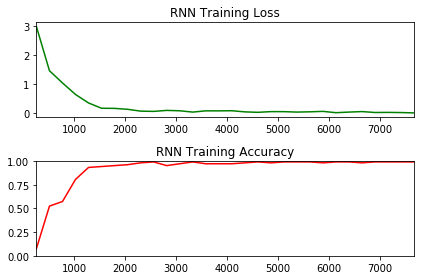

In [18]:
train_loss_plot = plt.subplot(211)
train_loss_plot.set_title('RNN Training Loss')
train_loss_plot.plot(rnn_train_batches, rnn_train_loss_batch, 'g')
train_loss_plot.set_xlim([rnn_train_batches[0], rnn_train_batches[-1]])

train_acc_plot = plt.subplot(212)
train_acc_plot.set_title('RNN Training Accuracy')
train_acc_plot.plot(rnn_train_batches, rnn_train_acc_batch, 'r')
train_acc_plot.set_ylim([0, 1.0])
train_acc_plot.set_xlim([rnn_train_batches[0], rnn_train_batches[-1]])

plt.tight_layout()
plt.show()

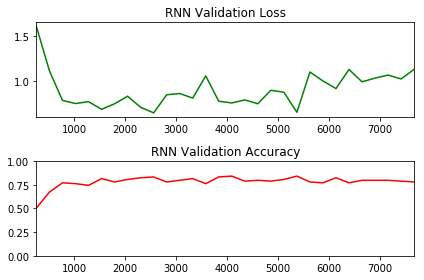

In [19]:
valid_loss_plot = plt.subplot(211)
valid_loss_plot.set_title('RNN Validation Loss')
valid_loss_plot.plot(rnn_valid_batches, rnn_valid_loss_batch, 'g')
valid_loss_plot.set_xlim([rnn_valid_batches[0], rnn_valid_batches[-1]])

valid_acc_plot = plt.subplot(212)
valid_acc_plot.set_title('RNN Validation Accuracy')
valid_acc_plot.plot(rnn_valid_batches, rnn_valid_acc_batch, 'r')
valid_acc_plot.set_ylim([0, 1.0])
valid_acc_plot.set_xlim([rnn_valid_batches[0], rnn_valid_batches[-1]])

plt.tight_layout()
plt.show()

In [6]:
input_y = tf.placeholder(tf.float32, [None, 20], name="input_y")
onehot = tf.placeholder(tf.int32, [None], name="onehot_in")
yy = tf.one_hot(onehot,20,1,0,name="one_hot")

graph = tf.get_default_graph()
sess=tf.Session()

saver1 = tf.train.import_meta_graph('cnn/cnn.ckpt-29.meta')
model_file1 = tf.train.latest_checkpoint('cnn/')
saver1.restore(sess, model_file1)
saver2 = tf.train.import_meta_graph('rnn/rnn.ckpt-25.meta')
model_file2 = tf.train.latest_checkpoint('rnn/')
saver2.restore(sess, model_file2)
scores = graph.get_operation_by_name("cnn_output/scores").outputs[0]
scores = tf.nn.l2_normalize(scores, dim=1)
prob = graph.get_operation_by_name("rnn_prob").outputs[0]
pp = tf.stack([scores, prob], axis=0)
qq = tf.reduce_mean(pp, 0)
accuracy = tf.reduce_mean(tf.cast(tf.equal(tf.argmax(input_y, axis=1), tf.argmax(qq, axis=1)), tf.float32))
cnn_input_x = graph.get_operation_by_name("cnn_encoder_inputs").outputs[0]
cnn_dropout = graph.get_operation_by_name("cnn_dropout_keep_prob").outputs[0]
rnn_input_x = graph.get_operation_by_name("rnn_encoder_inputs").outputs[0]
rnn_dropout = graph.get_operation_by_name("rnn_dropout_keep_prob").outputs[0]
v_count = 0
input_y_list = []
for i in range(len(valid_target)):
    input_x, y_ = div_xy(valid_data[i], valid_target[i], max_len)
    v_count += input_x.shape[0]
    input_y_list.extend(y_)
input_x_list = np.zeros((v_count, max_len), dtype=np.int32)
temp = 0
for i in range(len(valid_target)):
    input_x, _ = div_xy(valid_data[i], valid_target[i], max_len)
    for k in range(input_x.shape[0]):
        input_x_list[temp+k] = input_x[k]
    temp += input_x.shape[0]

yyy = sess.run(yy, feed_dict = {onehot : input_y_list}) 
vacc = sess.run(accuracy, feed_dict={
            cnn_input_x: input_x_list,
            rnn_input_x: input_x_list,
            cnn_dropout: 1.0,
            rnn_dropout: 1.0,
            input_y: yyy
        })
print (vacc)
sess.close()

INFO:tensorflow:Restoring parameters from cnn/cnn.ckpt-29
INFO:tensorflow:Restoring parameters from rnn/rnn.ckpt-25
0.815706


In [2]:
import pickle
db = open("sample_X", 'rb')
X = pickle.load(db)
db1 = open("sample_Y", 'rb')
Y = pickle.load(db1)

In [3]:
sen =[]
for i, t in enumerate(X):
    m = []
    for j, s in enumerate(t):
        m.append(s)
    sen.append((m, Y[i]))

In [4]:
from sklearn.model_selection import train_test_split
x, y = zip(*sen)
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=1234)

In [5]:
for i in range(len(y_train)):
    label = '__label__' + str(y_train[i])
    X_train[i].append([label])

In [6]:
with open('train_ft.txt', 'w') as f:
    for t in X_train:
        sen = [y for x in t for y in x]
        www = " ".join(sen)
        f.write(www+'\n')

In [7]:
xx = []
for t in X_test:
    sen = [y for x in t for y in x]
    www = " ".join(sen)
    xx.append(www)

In [8]:
import fasttext
from sklearn import metrics
import numpy as np
clf = fasttext.supervised('train_ft.txt', 'model', dim=200, ws=5, neg=5, epoch=100, min_count=10, lr=0.1, lr_update_rate=1000, bucket=200000)
labels = clf.predict(xx)
y_preds = np.array(labels).flatten().astype(int)
m_precision = metrics.precision_score(y_test, y_preds, average='micro')
print (m_precision)

0.883913412564
